#                                       **EDA ANALYSIS**

# Step 1 — Initial loading and exploration


The shape of the dataset is : (116, 10) 

The first 5 rows of the dataset are : 
    Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI       

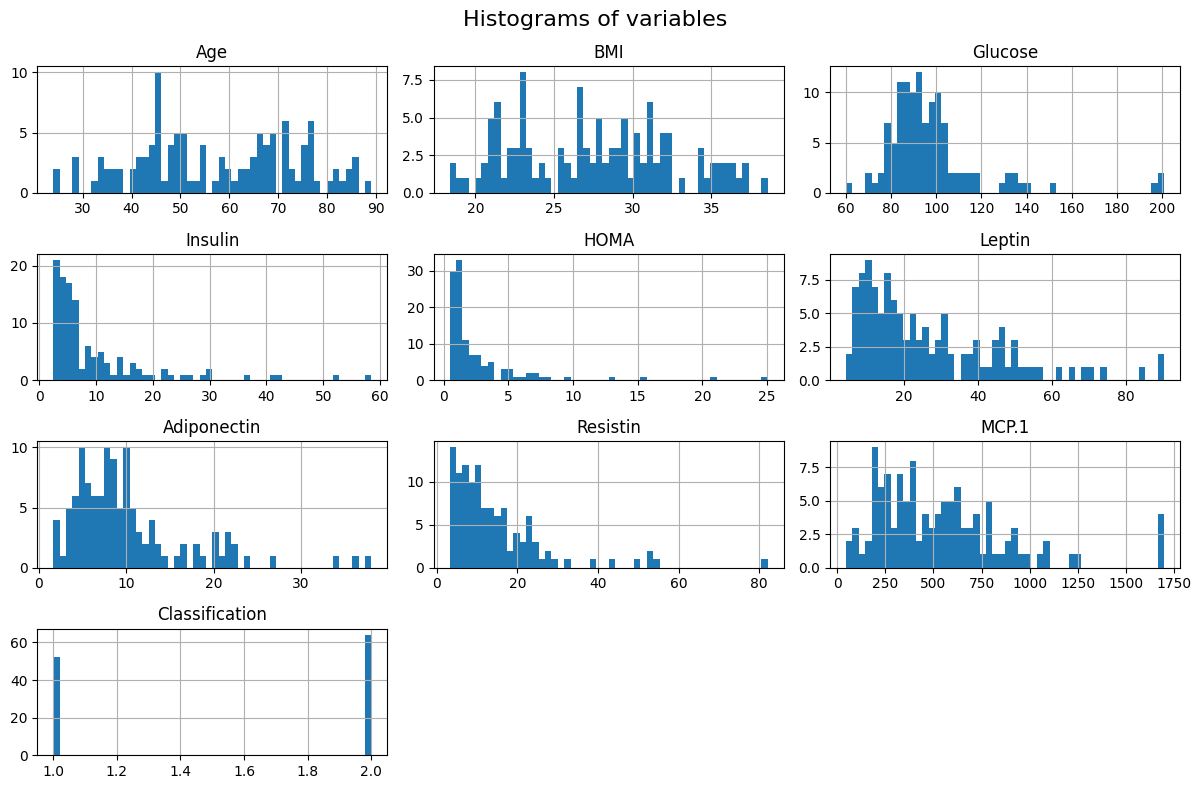

In [98]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('breast+cancer+coimbra/dataR2.csv')

# Data overview
print("The shape of the dataset is :",data.shape,"\n")
print("The first 5 rows of the dataset are : \n",data.head(),"\n")
data.info()

# List of explanatory variables
features = data.columns[:-1]
print("The explanatory variables are:", list(features),"\n")
target = 'Classification'

# Histograms of variables
data.hist(bins=50, figsize=(12, 8))
plt.suptitle("Histograms of variables", fontsize=16)
plt.tight_layout()
plt.show()


In [99]:
#Proportion of classes
print(data["Classification"].value_counts(normalize=True))
print("the dataset is not balanced")

Classification
2    0.551724
1    0.448276
Name: proportion, dtype: float64
the dataset is not balanced


In [100]:
#Check for missing values
print("The number of missing values in each column is:")
print(data.isna().sum())

The number of missing values in each column is:
Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64


We use data from the *Breast Cancer Coimbra* dataset, which contains biometric measurements of 116 patients. The objective is to **predict whether a patient has breast cancer** based on **nine biological markers**.

### General Information

- **Number of observations**: 116  
- **Number of variables**: 10  
  - **9 continuous explanatory variables**:  
    `Age`, `BMI`, `Glucose`, `Insulin`, `HOMA`, `Leptin`, `Adiponectin`, `Resistin`, `MCP.1`  
  - **1 binary target variable**: `Classification`  
    - `2`: Patient has cancer (**positive class**)  
    - `1`: Patient is healthy (**negative class**)  

There are **no missing values** in the dataset, which allows us to proceed directly with exploratory analysis.

### Distribution of Variables

We visualized the distributions of all variables using **histograms**. This step helps detect irregularities or preprocessing needs.

- Several variables show **strong asymmetry** and **long right tails**, notably:  
  `Insulin`, `HOMA`, `Leptin`, `Adiponectin`, `Resistin`, and `MCP.1`.  
  → These patterns may hinder model performance and justify a **logarithmic transformation**.

- The **target variable is imbalanced**:  
  Around **55%** of the patients are healthy, while **45%** have cancer.  
  → This class imbalance will influence our **choice of evaluation metrics**: relying solely on accuracy would be misleading.

---

### Next Step

To ensure robust training and fair evaluation, we will now:

- Separate **features** from the **target** variable
- Apply a **stratified train-test split** to preserve class proportions in both sets


# Step 2 — Split the dataset into training and testing sets


In [101]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop(columns='Classification')
y = data['Classification'].map({2: 1, 1: 0})
# Mapping: 2 = patient with cancer (positive class), 1 = healthy patient (negative class)
# We recode to: 1 → positive, 0 → negative

# Stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y)

# Check shapes of the splits
print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape, "\n")

print("Train class distribution:", y_train.value_counts(normalize=True), "\n")
print("Test class distribution :", y_test.value_counts(normalize=True))



Train: (92, 9) (92,)
Test : (24, 9) (24,) 

Train class distribution: Classification
1    0.554348
0    0.445652
Name: proportion, dtype: float64 

Test class distribution : Classification
1    0.541667
0    0.458333
Name: proportion, dtype: float64


To prepare for supervised modeling, we begin by separating:

- **Explanatory variables** (features) → `X`  
- **Target variable** (`Classification`) → `y`

We recode the target to improve interpretability:

- `1` → Patient has cancer (**positive class**)  
- `0` → Patient is healthy (**negative class**)

### Stratified Sampling

To preserve the original class proportions in both training and testing sets, we perform a **stratified split** using the `train_test_split` function from `scikit-learn`.

This is especially important given the observed **class imbalance** in the dataset.

### Resulting Dataset Structure

- **Training set**: 92 patients  
- **Test set**: 24 patients  
- **Split ratio**: 80% / 20%

### Class Proportions (Post-Split)

- **Training set**:  
  ~55.4% class `1` (cancer), ~44.6% class `0` (healthy)

- **Test set**:  
  ~54.2% class `1` (cancer), ~45.8% class `0` (healthy)

✅ The class distribution is successfully preserved across both sets.


# Step 3 — Visualization of distributions by class in the training dataset


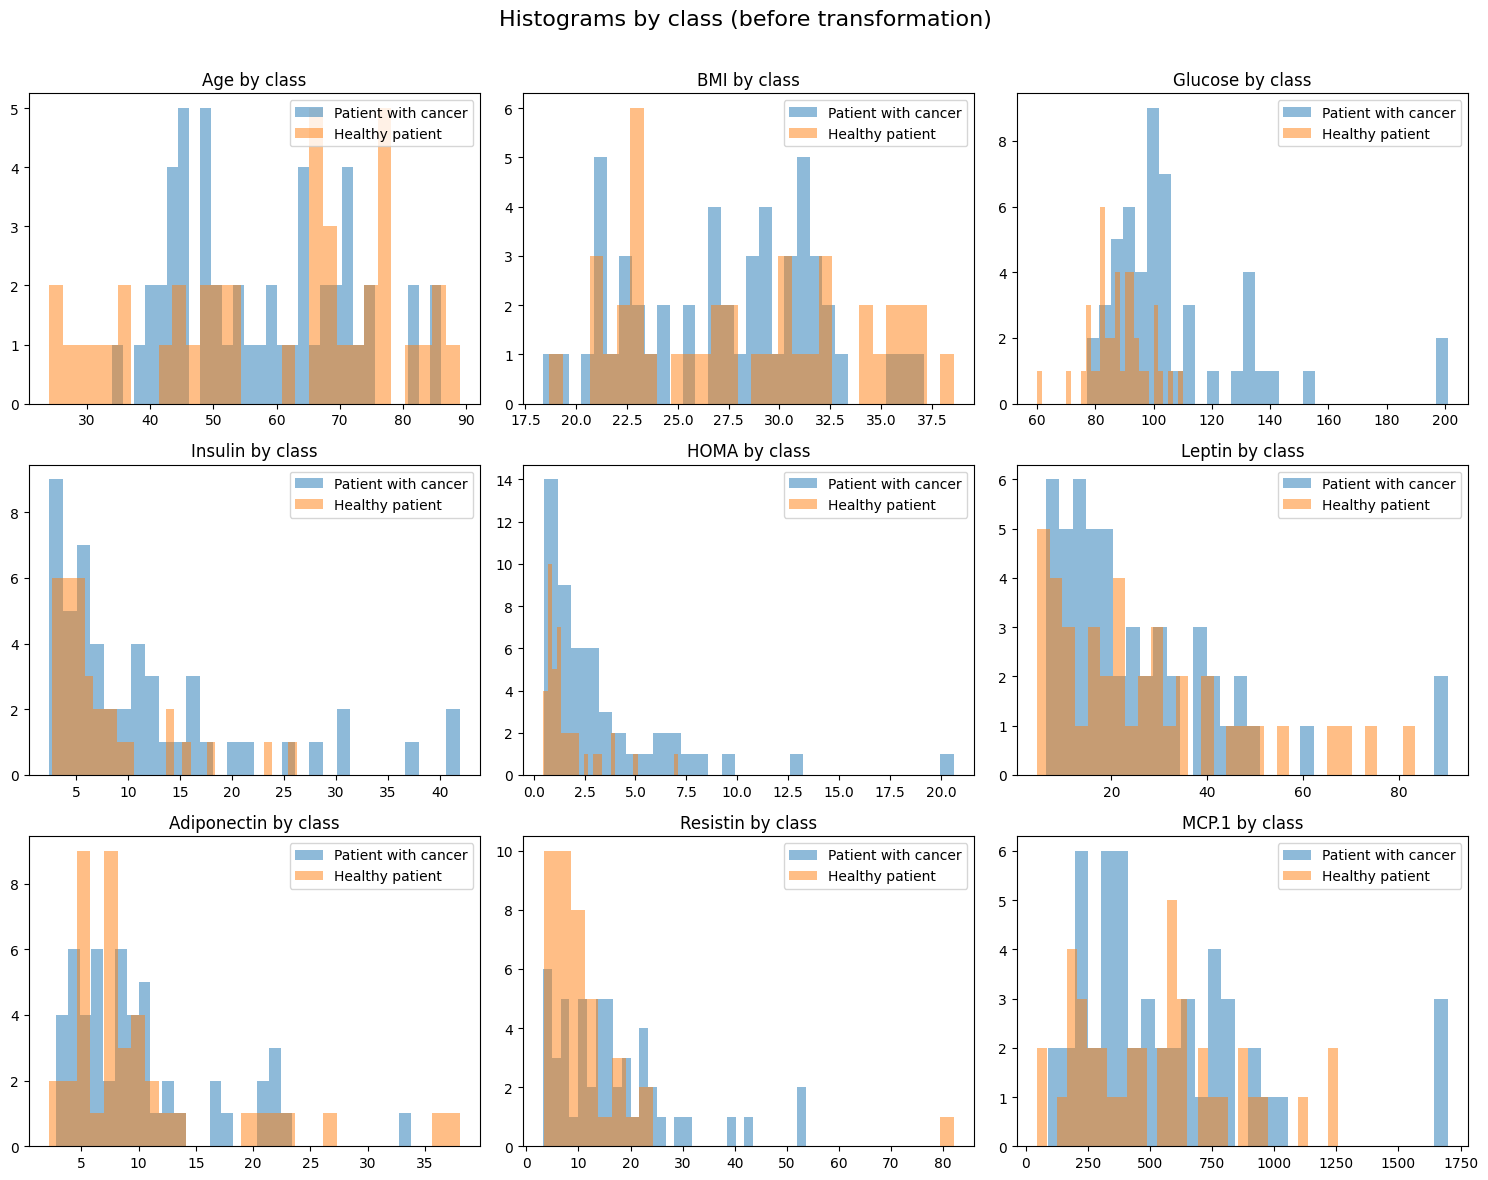

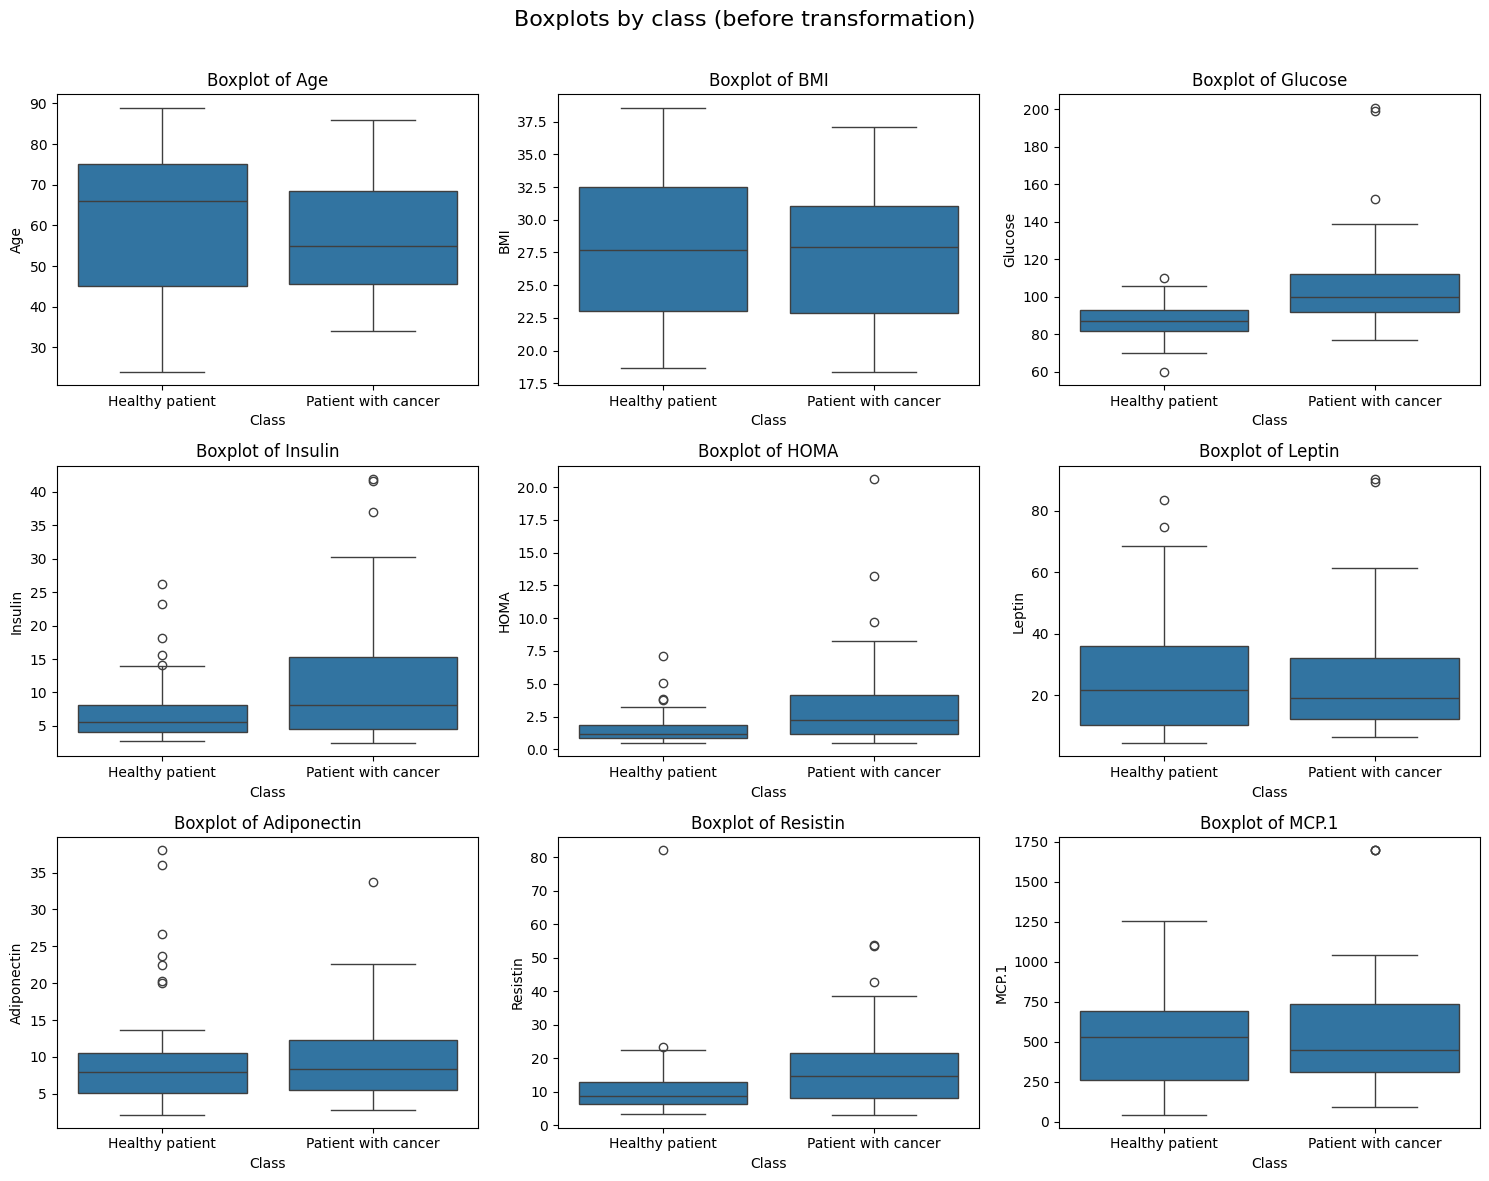

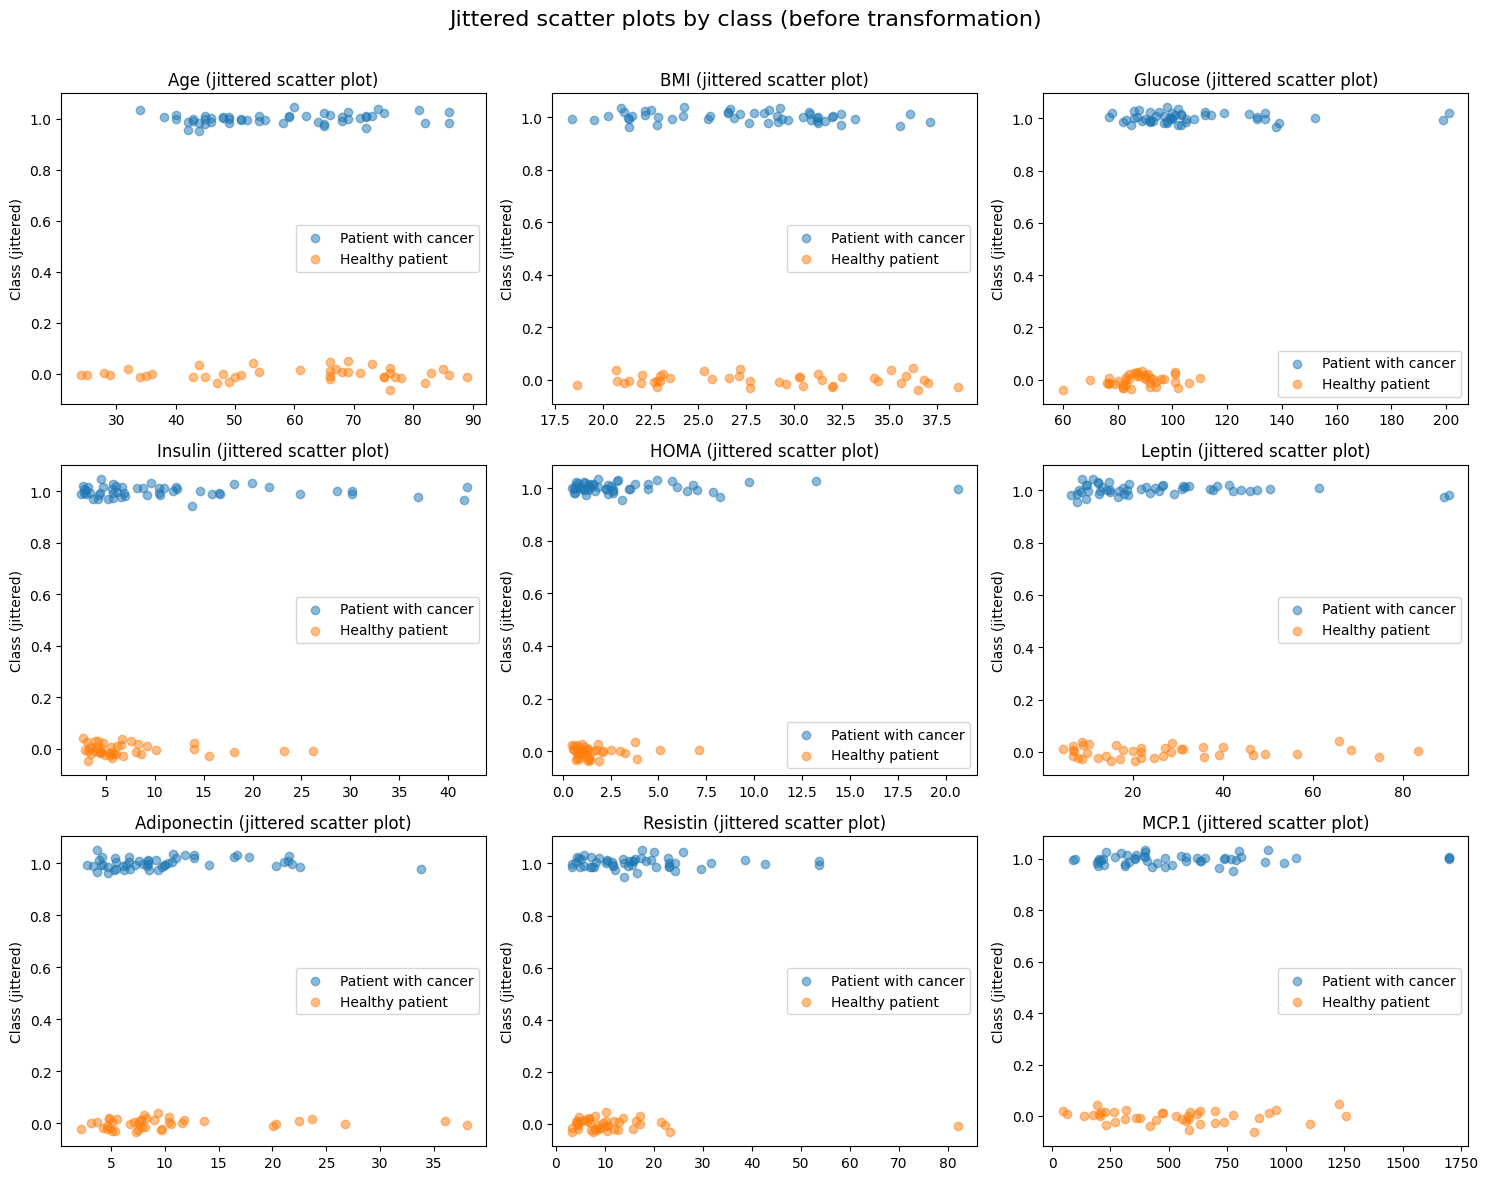

In [102]:
# Temporary merge for visualization
train_data = X_train.copy()
train_data['Classification'] = y_train

variables = X_train.columns.tolist()
n_cols = 3
n_rows = int(np.ceil(len(variables) / n_cols))
class_labels = {1: 'Patient with cancer', 0: 'Healthy patient'}

# Histograms by class
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(variables):
    for cls in [1, 0]:  # 1 = malade, 0 = sain
        axes[i].hist(X_train[y_train == cls][col], bins=30, alpha=0.5, label=class_labels[cls])
    axes[i].set_title(f"{col} by class")
    axes[i].legend()

# Supprimer axes inutilisés
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histograms by class (before transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Boxplots by class
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(variables):
    sns.boxplot(x=y_train, y=X_train[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel(col)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels([class_labels[0], class_labels[1]])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots by class (before transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Jittered scatter plots by class
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(variables):
    for cls in [1, 0]:
        axes[i].scatter(
            X_train[y_train == cls][col],
            np.random.normal(loc=cls, scale=0.02, size=X_train[y_train == cls][col].shape),
            alpha=0.5,
            label=class_labels[cls]
        )
    axes[i].set_title(f"{col} (jittered scatter plot)")
    axes[i].set_ylabel("Class (jittered)")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Jittered scatter plots by class (before transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [103]:
print("Healthy patients:\n", X_train[y_train == 0].describe())
print("\nCancer patients:\n", X_train[y_train == 1].describe())

Healthy patients:
              Age        BMI     Glucose    Insulin       HOMA     Leptin  \
count  41.000000  41.000000   41.000000  41.000000  41.000000  41.000000   
mean   59.195122  28.397908   87.804878   7.263829   1.627387  27.433273   
std    18.911927   5.691456    9.762734   5.353097   1.344318  20.239726   
min    24.000000  18.670000   60.000000   2.707000   0.467409   4.470000   
25%    45.000000  23.000000   82.000000   4.090000   0.827271  10.280900   
50%    66.000000  27.700000   87.000000   5.537000   1.145436  21.786300   
75%    75.000000  32.500000   93.000000   8.079000   1.840410  35.891000   
max    89.000000  38.578759  110.000000  26.211000   7.111918  83.482100   

       Adiponectin   Resistin        MCP.1  
count    41.000000  41.000000    41.000000  
mean     10.641013  11.608922   522.124707  
std       8.313134  12.414262   307.280571  
min       2.194280   3.291750    45.843000  
25%       5.100000   6.284450   263.499000  
50%       7.931700   8.704

To better understand the discriminative potential of each variable, we analyzed the distributions by class (healthy vs. cancer) using the training set. We combined three complementary types of visualizations: histograms, boxplots, and jittered scatter plots, followed by descriptive statistics for each class.

---

### Objective

The goal of this step is to assess whether some features show different behaviors across the two classes:
- Class `0` = healthy patients,
- Class `1` = cancer patients.

By visually comparing the distributions, we aim to identify features that could be informative for classification.

---

### Histograms by Class

The histograms highlight the distribution of values for each variable, separated by class. Key observations:

- `Glucose`, `Insulin`, `HOMA`, and `Resistin` show noticeable right-shifted distributions for class 1, suggesting higher values in cancer patients.
- `Adiponectin` and `MCP.1` exhibit moderate class-dependent density shifts.
- `BMI` and `Leptin` display strong overlaps between classes, suggesting limited discriminative power on their own.

These preliminary shifts suggest that some variables may carry predictive signal, although no single feature is perfectly separating.

---

### Boxplots by Class

Boxplots provide a clearer comparison of medians, dispersion, and outliers for each variable:

- High dispersion is visible across most features, particularly for `Insulin`, `HOMA`, `Resistin`, and `MCP.1`, with long upper tails in class 1.
- `Resistin` and `HOMA` show visibly higher medians in cancer patients.
- Outliers are frequent in both classes, justifying the need for transformation or robust models.

---

### Jittered Scatter Plots

To better visualize class separation (especially for categorical targets), we used jittered scatter plots:

- The vertical axis encodes the class (0 or 1), while the horizontal axis shows the variable value.
- These plots reveal:
  - Some clusters (e.g., low `Insulin` and `Adiponectin` values for class 0),
  - But substantial horizontal overlap remains across most features.

These plots visually confirm that no single variable can fully separate the classes, underscoring the importance of multivariate modeling.

---

### Descriptive Statistics by Class

We computed summary statistics separately for each class to numerically reinforce visual trends.

#### Healthy patients (class 0)

- Mean Glucose: 87.8
- Mean Insulin: 7.3
- Mean HOMA: 1.63
- Mean Resistin: 11.6
- High variability observed (standard deviations often > 5)

#### Cancer patients (class 1)

- Mean Glucose: 106.7
- Mean Insulin: 11.8
- Mean HOMA: 3.36
- Mean Resistin: 16.6
- The distributions are more skewed and dispersed than in class 0

These numerical insights confirm what was seen in the plots: class 1 patients tend to have higher values and more variability in metabolic features.

---

### Summary of EDA Findings

- Several features show partial class separation, including:  
  `Glucose`, `Insulin`, `HOMA`, `Resistin`, `MCP.1`.
- Most distributions are asymmetric, with long tails and outliers.
- There is high intra-class variance, suggesting noise and overlap.
- These findings motivate:
  - A logarithmic transformation of skewed variables,
  - Standardization to control for different scales,
  - The use of regularized or nonlinear models to handle multicollinearity and partial separability.

---

### Conclusion

This exploratory step confirms that:

- The dataset contains informative but noisy features,
- No feature alone is sufficient, but combinations of features are likely discriminative,
- Visual and statistical patterns strongly support the preprocessing choices in the next steps:
  - Log transformation,
  - Standardization,
  - Regularized classification models.

We now proceed to Step 4 — correlation analysis.


# Step 4 — Correlation matrix and scatter matrix (training set only)


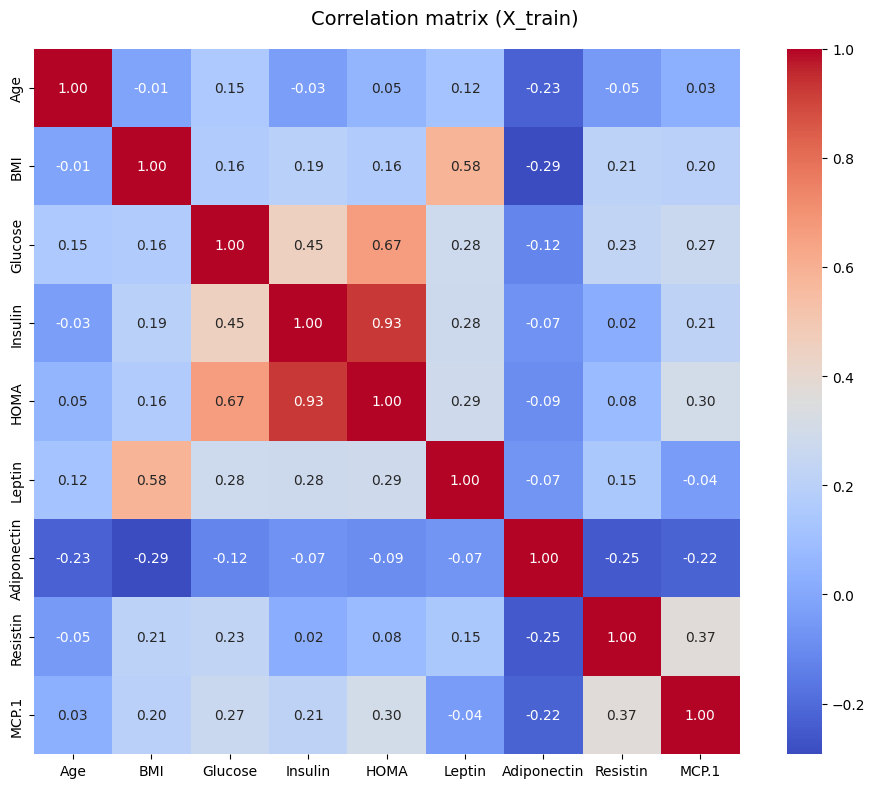

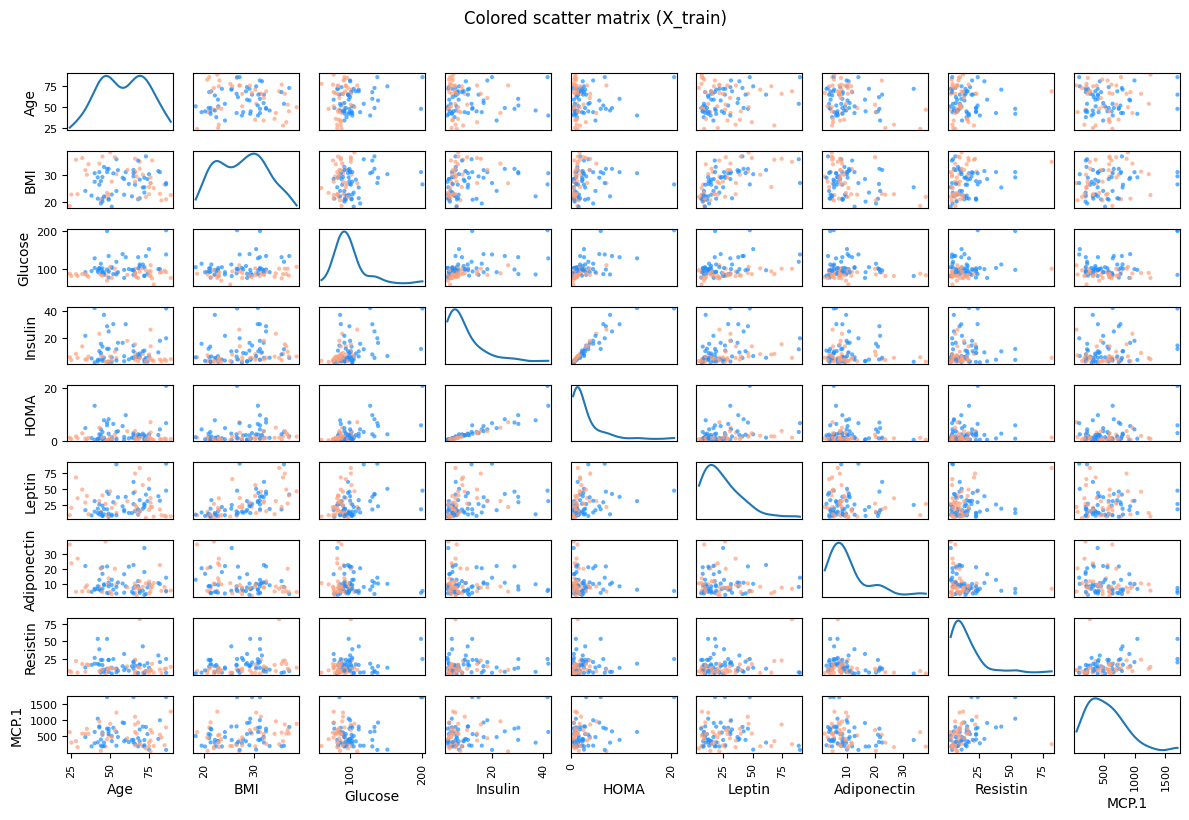

In [104]:
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap


# Correlation matrix (on training data)
corr_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.suptitle("Correlation matrix (X_train)", fontsize=14)
plt.tight_layout()
plt.show()

# Combined DataFrame for colored visualization
X_train_visu = X_train.copy()
X_train_visu['Classification'] = y_train.values

# Custom color map: 0 = Healthy (light red), 1 = Cancer (blue)
custom_cmap = ListedColormap(["#FFA07A", "#1E90FF"])  # light salmon, dodger blue

# Colored scatter matrix
scatter_matrix(X_train_visu.drop(columns='Classification'),
               figsize=(12, 8),
               diagonal='kde',
               c=X_train_visu['Classification'],
               cmap=custom_cmap,
               alpha=0.7)
plt.suptitle("Colored scatter matrix (X_train)", y=1.02)
plt.tight_layout()
plt.show()


After inspecting individual variable distributions and class-dependent variations, we now explore **pairwise relationships between variables** to:

- detect potential **redundancies** or **multicollinearity**,
- assess the relevance of **dimensionality reduction or regularization** techniques,
- and evaluate how well the different features contribute **complementary** information.

We perform this analysis on the **training set only** to avoid any data leakage.

---

### Correlation Matrix (Pearson Coefficients)

The **correlation matrix** below summarizes the **linear relationships** between continuous explanatory variables using Pearson correlation coefficients (ρ):

- Values near **+1** indicate a **strong positive linear correlation**.
- Values near **0** indicate **no linear correlation**.
- Values near **–1** (none observed here) would indicate a **strong negative correlation**.

#### Key observations:

- **`Insulin` and `HOMA`** show an extremely high correlation (ρ ≈ 0.93). This is expected, as `HOMA` is a deterministic function of `Insulin` and `Glucose`:

  $$
  \text{HOMA} = \frac{\text{Glucose} \times \text{Insulin}}{405}
  $$

- Moderate correlations include:
  - `Glucose` and `HOMA` (ρ ≈ 0.67)
  - `BMI` and `Leptin` (ρ ≈ 0.58)

- All other variable pairs have correlations **below 0.4**, suggesting that most features carry **distinct and complementary information**.

This supports the use of the full feature set, but also **justifies regularization** or **dimensionality reduction** (e.g., PCA) to address potential multicollinearity in models like logistic regression.

---

### Colored Scatter Matrix (Pairwise Interactions with Class Overlay)

To further explore the structure of the data and how variables relate to class membership, we plot a **scatter matrix**, where each point is colored by its class:

- **Blue**: Class 1 (patient with cancer)
- **Red**: Class 0 (healthy patient)

This visualization helps assess whether **pairs of variables** allow separation of the two groups.

#### Key observations:

- The `Insulin`–`HOMA` pair displays a nearly perfect linear relationship, confirming the analytical link.
- Some variable combinations suggest **partial clustering** by class, such as:
  - `Resistin` vs `MCP.1`
  - `Adiponectin` vs `HOMA`
  - `Glucose` vs `Insulin`
- However, the **overlap remains substantial** in most 2D projections.

These findings imply that:

- **No individual variable pair** fully separates the classes.
- Discriminative power is likely to emerge from **higher-dimensional or nonlinear** interactions.

---

### Summary of Step 4

#### Insights:

- A few strong linear relationships (notably `Insulin`–`HOMA`) warrant caution, especially in **unregularized linear models**.
- Most variables provide **non-redundant information**, supporting their joint use.
- The **absence of clear separation in 2D** reinforces the need for **multivariate and possibly nonlinear modeling** strategies.

#### Consequences:

- **Standardization** will be necessary before modeling to neutralize differences in scale.
- We may apply:
  - **L1 regularization** (to sparsify coefficients),
  - or **PCA** (to decorrelate features),
  - or continue with all variables if models used are robust to collinearity.

We now proceed to **data transformation and scaling** before supervised modeling.


# Step 5 — Logarithmic transformation


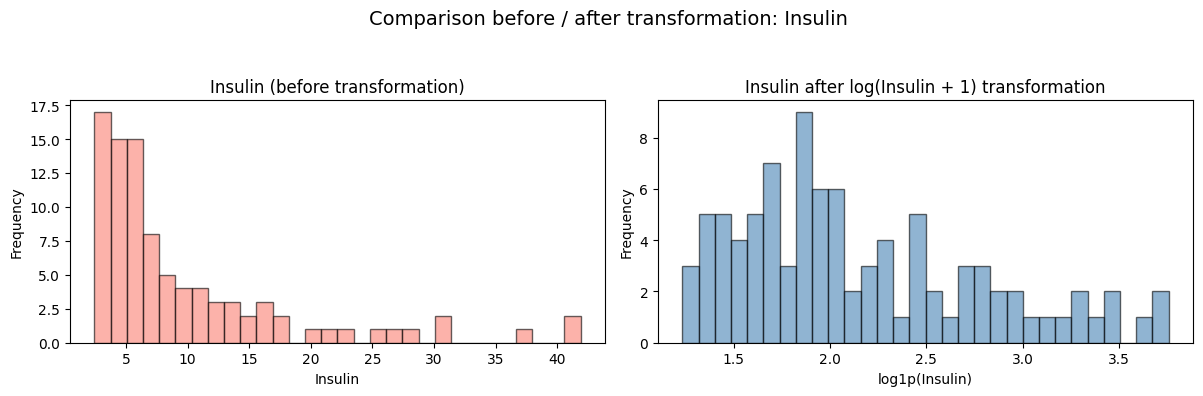

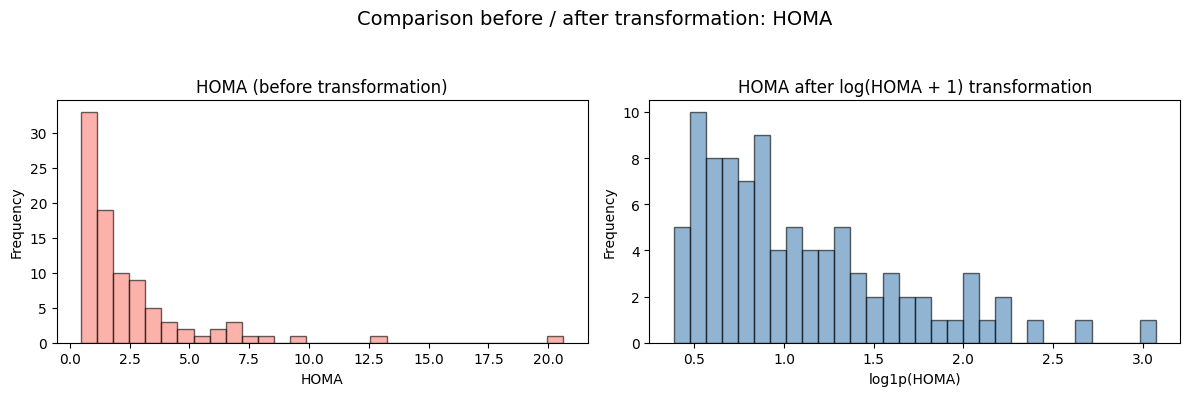

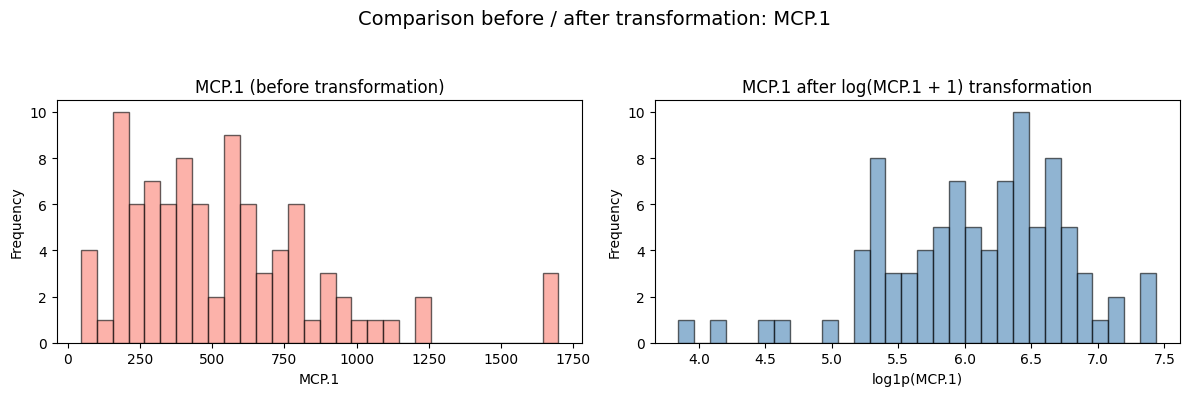

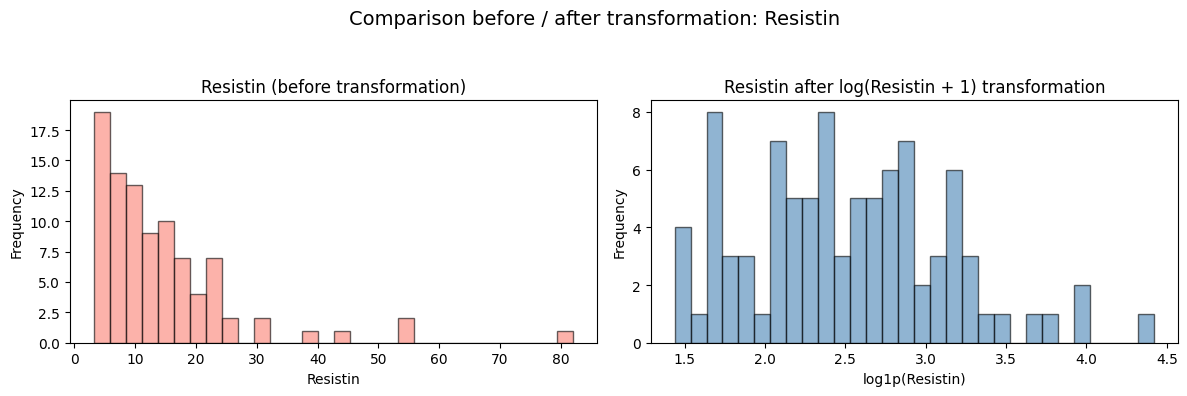

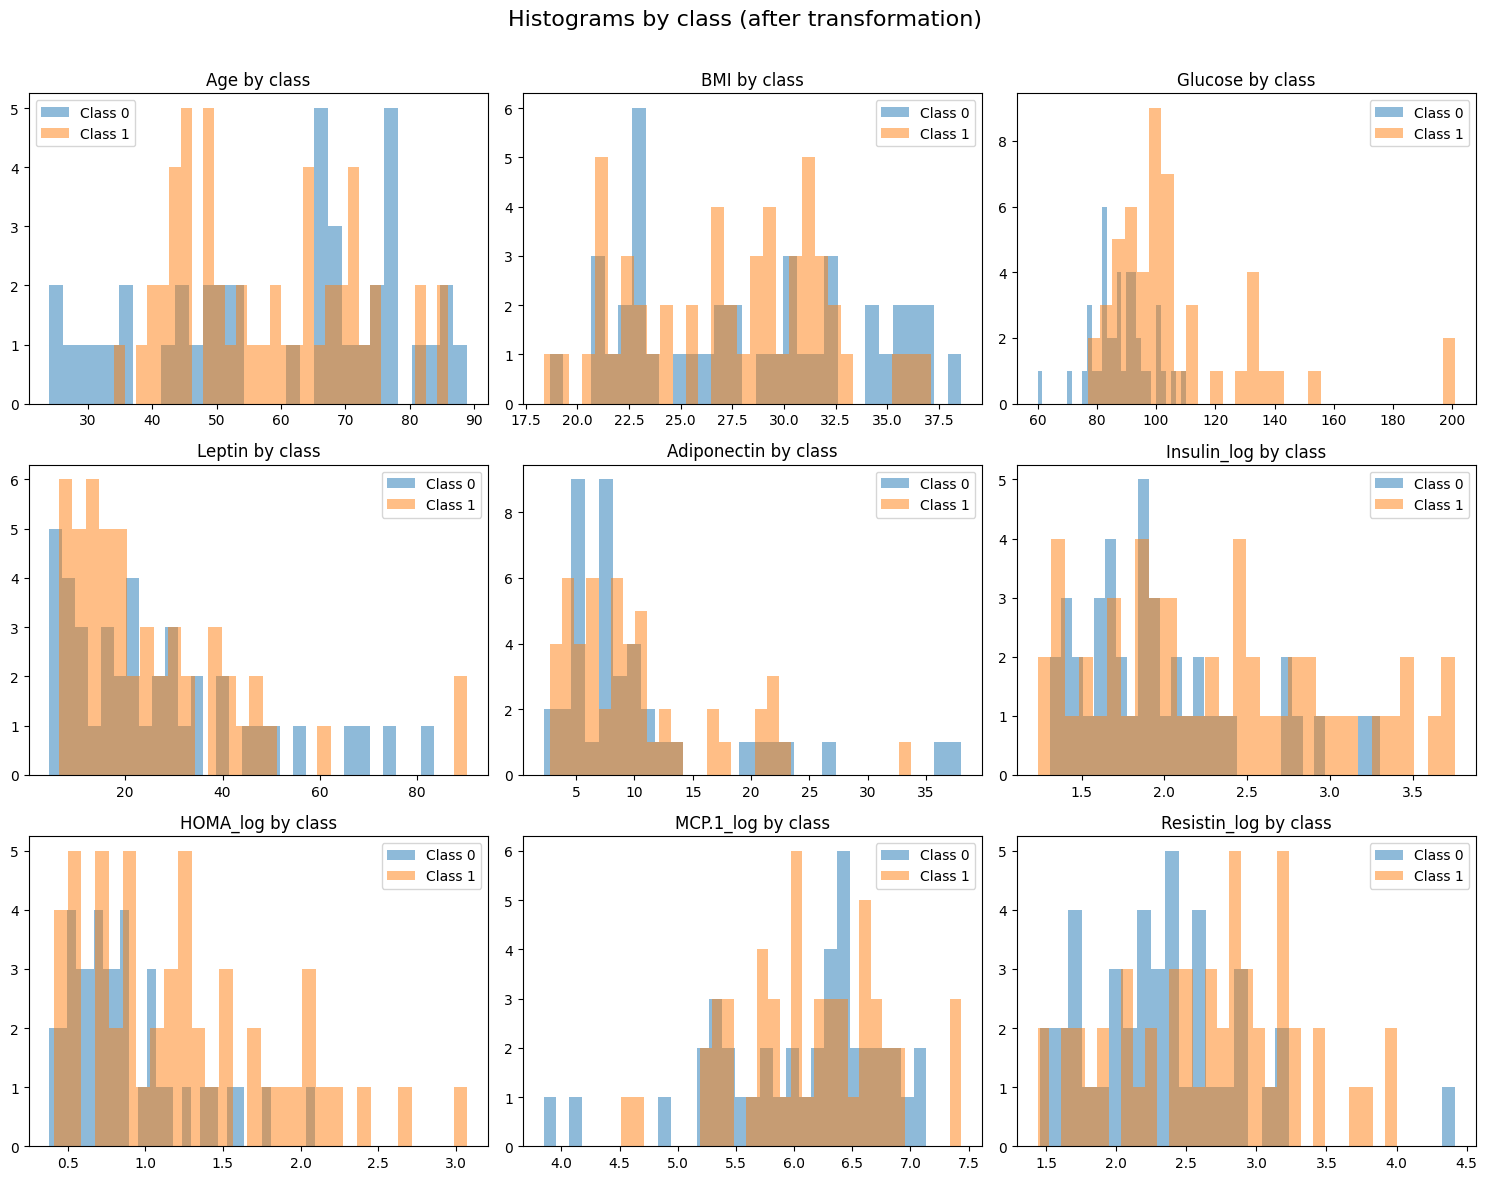

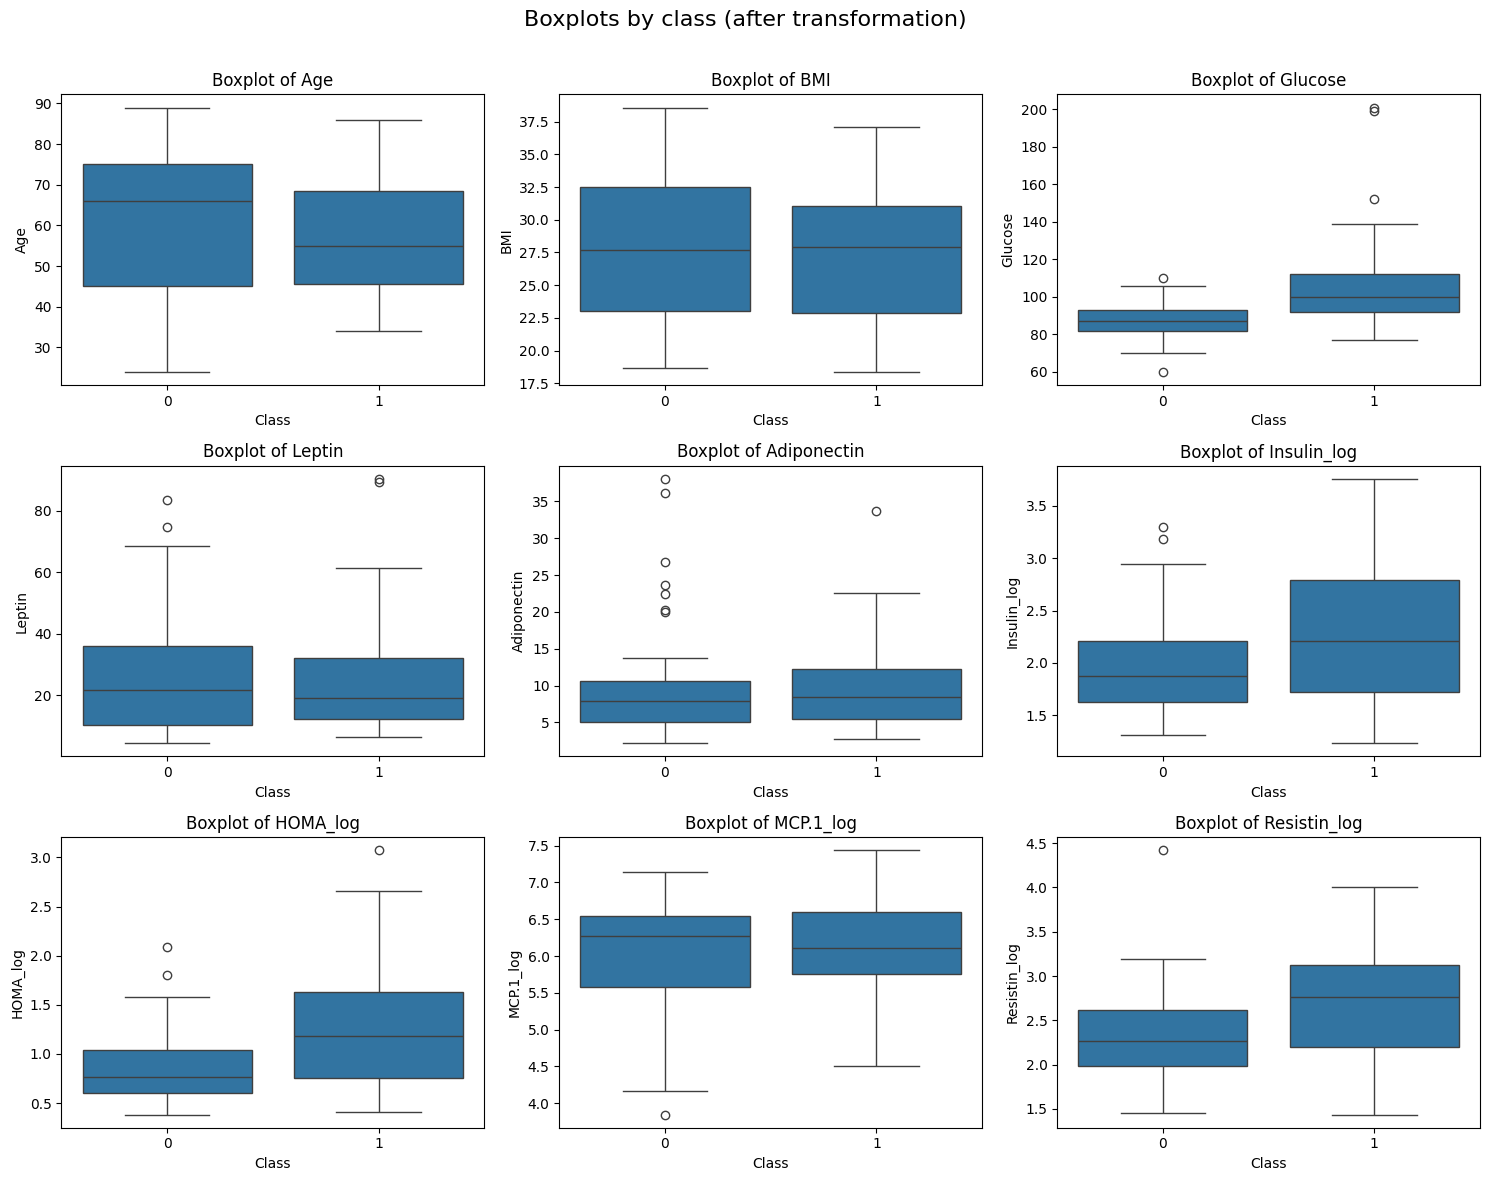

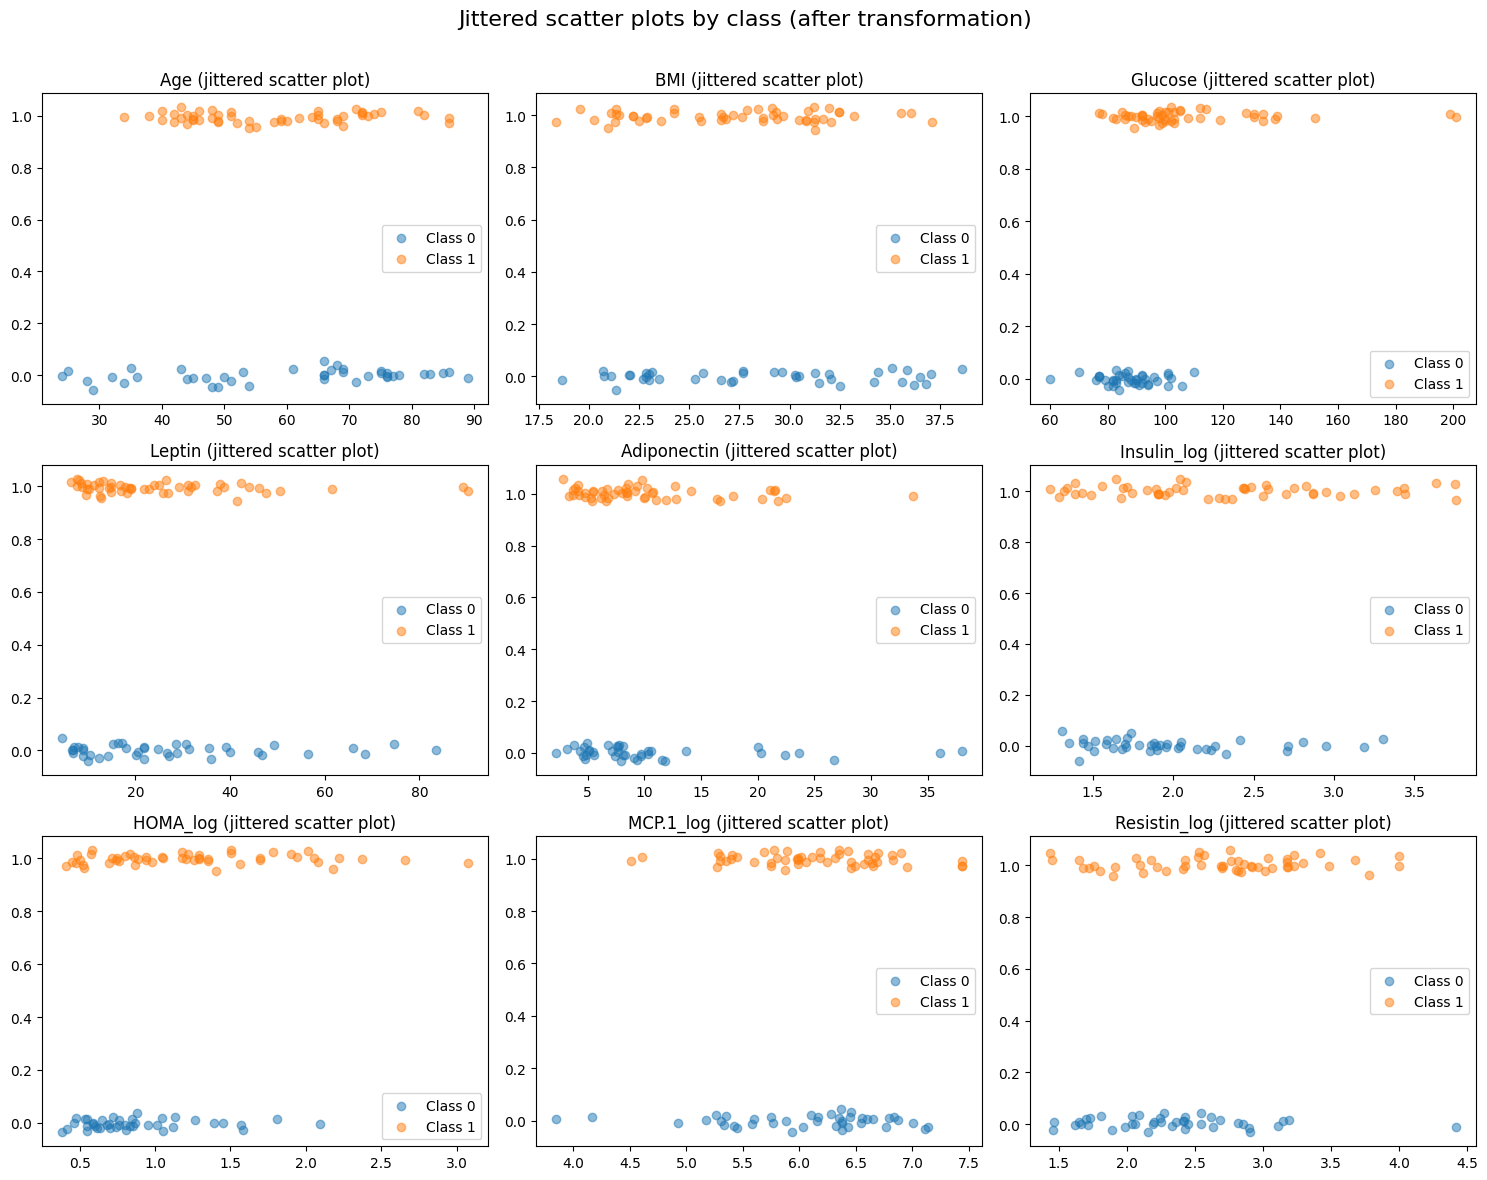

In [105]:
# List of variables to transform (asymmetric distributions)
variables_log = ['Insulin', 'HOMA', 'MCP.1', 'Resistin']

# Comparison before / after transformation (1 figure per variable)
for col in variables_log:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Before transformation
    axes[0].hist(X_train[col], bins=30, alpha=0.6, color='salmon', edgecolor='black')
    axes[0].set_title(f"{col} (before transformation)")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")

    # After log1p transformation
    transformed = np.log1p(X_train[col])
    axes[1].hist(transformed, bins=30, alpha=0.6, color='steelblue', edgecolor='black')
    axes[1].set_title(f"{col} after log({col} + 1) transformation")
    axes[1].set_xlabel(f"log1p({col})")
    axes[1].set_ylabel("Frequency")

    plt.suptitle(f"Comparison before / after transformation: {col}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

# Apply the transformation to X_train
X_train_transformed = X_train.copy()
for col in variables_log:
    X_train_transformed[col + '_log'] = np.log1p(X_train[col])
X_train_transformed = X_train_transformed.drop(columns=variables_log)

# Update the list of transformed features
features = X_train_transformed.columns.tolist()

# Merge with y_train to facilitate visualization
train_data2 = X_train_transformed.copy()
train_data2['Classification'] = y_train.values

# Histograms by class
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    for cls in [0, 1]:
        axes[i].hist(train_data2[train_data2['Classification'] == cls][col],
                     bins=30, alpha=0.5, label=f"Class {cls}")
    axes[i].set_title(f"{col} by class")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histograms by class (after transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Boxplots by class

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='Classification', y=col, data=train_data2, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots by class (after transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Jittered scatter plots by class

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    for cls in [0, 1]:
        values = train_data2[train_data2['Classification'] == cls][col]
        jittered_y = np.random.normal(loc=cls, scale=0.02, size=values.shape)
        axes[i].scatter(values, jittered_y, alpha=0.5, label=f"Class {cls}")
    axes[i].set_title(f"{col} (jittered scatter plot)")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Jittered scatter plots by class (after transformation)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


#### Objective

The initial exploratory analysis highlighted several variables exhibiting strong right-skewness and extreme values, notably:

- `Insulin`,  
- `HOMA`,  
- `MCP.1`,  
- `Resistin`.

Such distributions may negatively impact the performance of machine learning models sensitive to scale differences or non-normality, including logistic regression, SVMs, and k-nearest neighbors. 

To address this, we apply a **logarithmic transformation** of the form `log(x + 1)` using NumPy’s `np.log1p` function. This transformation compresses large values, reduces skewness, and brings the distributions closer to Gaussian, which improves data regularity and supports model training.

---

#### Comparison Before / After Transformation

The following plots compare the distribution of each targeted variable **before and after** applying the log transformation:

- Right tails are **substantially reduced**.
- Distributions become **more compact and symmetric**.
- Variability is stabilized, which facilitates **standardization** and enhances interpretability.

These graphical comparisons provide **a clear visual justification** for the use of log transformation on these variables.

---

#### Dataset Update

- The transformed variables were renamed to `*_log` (e.g., `Insulin_log`) and **added** to the training dataset.
- The original (raw) variables were **removed** to avoid redundancy and multicollinearity.
- The list of features was updated accordingly.

---

#### Effect on Class-Separated Distributions

We re-examined the transformed variables using three complementary plots (as done in the raw version):

##### • Histograms by class

Histograms show that after transformation:

- Distributions are much more **uniform and comparable** between the two classes.
- Differences remain observable, particularly for `Insulin_log`, `HOMA_log`, and `Resistin_log`, but are now embedded in **more regular shapes**.

##### • Boxplots by class

The boxplots reveal:

- A **reduction in the number and intensity of outliers**.
- Interquartile ranges (IQRs) are narrower and more symmetric.
- Median differences between classes are more interpretable (e.g., `Insulin_log` and `Resistin_log`).

##### • Jittered scatter plots

These scatter plots help visualize how individual observations separate vertically across class labels:

- The **horizontal spread is better controlled**, enhancing the applicability of distance-based models.
- Some separation patterns (e.g., for `MCP.1_log`, `Resistin_log`) are still visible, but overlap remains significant — reinforcing the need for multivariate modeling.

---

#### Conclusion

Applying a logarithmic transformation on skewed variables allowed us to:

- **Reduce the influence of extreme values**,  
- **Stabilize variance**,  
- **Improve the regularity and symmetry** of variable distributions,  
- **Facilitate downstream standardization and model fitting**.

This transformation is thus considered an **essential preprocessing step** prior to standardization and supervised learning.


# Step 6 — Standardization (StandardScaler)


In [106]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the transformed training set and transform
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_transformed),
    columns=X_train_transformed.columns,
    index=X_train_transformed.index
)

# Display summary statistics of scaled data
X_train_scaled.describe().T[['mean', 'std']]


,mean,std
Age,-2.003229e-16,1.005479
BMI,-6.389816e-16,1.005479
Glucose,8.326673e-17,1.005479
Leptin,-5.068409e-17,1.005479
Adiponectin,8.839547e-17,1.005479
Insulin_log,-1.194697e-16,1.005479
HOMA_log,-2.256649e-16,1.005479
MCP.1_log,1.128324e-15,1.005479
Resistin_log,6.552729e-16,1.005479


### Objective

After applying logarithmic transformation to asymmetric variables, we apply **standardization** to all explanatory variables in the training set.  
This step aims to **bring all variables to the same scale** by centering them around zero and scaling them to unit variance.

Standardization is particularly important for models sensitive to distances or scale differences, such as:
- logistic regression (for more stable convergence),
- support vector machines (SVM),
- k-nearest neighbors (k-NN),
- regularization methods (Ridge, Lasso),
- and dimensionality reduction techniques (PCA, etc.).

---
### Method

The transformation used is the classical Z-score standardization, defined as:

$$
X^{(i)}_{\text{std}} = \frac{X^{(i)} - \mu^{(i)}}{\sigma^{(i)}}
$$

where \( \mu^{(i)} \) and \( \sigma^{(i)} \) denote respectively the mean and standard deviation of variable \( X^{(i)} \) computed on the training set.

We use the `StandardScaler` tool from `scikit-learn`, applied only on the training data (`fit_transform`) to avoid any data leakage.


# Step 7 — Preparation of X_test


In [107]:
# Copy X_test
X_test_transformed = X_test.copy()

# Apply the same log-transformations
for col in variables_log:
    X_test_transformed[col + '_log'] = np.log1p(X_test_transformed[col])

# Drop original columns
X_test_transformed = X_test_transformed.drop(columns=variables_log)

# Standardize using the scaler previously fitted on X_train
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_transformed),
    columns=X_test_transformed.columns,
    index=X_test_transformed.index
)

# Check that the columns of X_test are identical (and in the same order) as those of X_train to avoid prediction errors
if list(X_train_scaled.columns) != list(X_test_scaled.columns):
    print("Mismatch between train and test columns")


The transformations previously applied to the training set (logarithmic transformation + standardization) must be **reproduced exactly the same way** on the test set, without re-estimating any parameters.

### Steps performed:
1. **Logarithmic transformation** on the same variables (`Insulin`, `HOMA`, `MCP.1`, `Resistin`) using `log(x + 1)`;
2. **Removal of raw variables** to avoid redundancy;
3. **Standardization using the same parameters** (mean `μ`, standard deviation `σ`) learned from `X_train`, via `scaler.transform()`.

We also verified that the **columns of `X_test_scaled` are exactly the same (and in the same order)** as those of `X_train_scaled`, ensuring compatibility with the learning models.

---

This step completes the preprocessing pipeline and allows us to proceed to **supervised modeling**.
